# Image Classification using a Simple Convolutional Neural Network

This notebook covers an image classification problem using the cifar10 dataset, a collection of thousands of color images that fall into ten distinct categories. Using a limited number of epochs this model was able to predict over 75% of 10,000 test images correctly.

## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

## Building the CNN Model

In [2]:
def create_model(input_shape):
    model = Sequential()
    
    # Convolutional Layers
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())

    # Fully Connected Layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    # 10 nodes in output layer corresponding to 10 possible classes
    model.add(Dense(10, activation='softmax'))
    
    return model

## Loading and Visualizing the Dataset

Next, load in the cifar10 dataset which is built in to Keras. The set contains 50,000 training images and 10,000 test images all of which are color 32 x 32 images that fall into one of ten categories.

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert our target labels into one-hot encodings representing category
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Show info regarding our train/test sets
print(f'Number of train samples: {X_train.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

Number of train samples: 50000
Number of test samples: 10000


Let's visualize our data and see some images with their corresponding labels

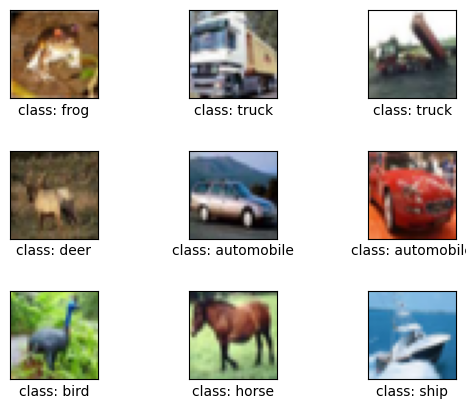

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    
    x_label = 'class: {0}'.format(class_names[y_train[i].argmax()])
    
    # Display classes as label for the x-axis
    ax.set_xlabel(x_label)
    
    # Removing ticks off of plot
    ax.set_xticks([])
    ax.set_yticks([])

Our provided image format is provided as 8-bit values ranging from 0-255. To make this input acceptable for a neural network we'll want to convert its format into floating point values ranging from 0-1.

In [5]:
# Change type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize to be in range 0-1
X_train = X_train / 255
X_test = X_test / 255

## Model Training

After changing data format we are now ready to create and compile the CNN model

In [6]:
# Going to use RMSProp for our optimizer
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# Create and compile our model
model = create_model(X_train.shape[1:])
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

Now we will train the neural network for 10 epochs

In [10]:
model.fit(X_train, y_train,
          batch_size=32,
          epochs=25,
          validation_data=(X_test, y_test),
          shuffle=True)


Epoch 1/25
1563/1563 [==============================] - 222s 142ms/step - loss: 1.4442 - accuracy: 0.4679 - val_loss: 1.3621 - val_accuracy: 0.5076
Epoch 2/25
1563/1563 [==============================] - 215s 137ms/step - loss: 1.3512 - accuracy: 0.5090 - val_loss: 1.2269 - val_accuracy: 0.5563
Epoch 3/25
1563/1563 [==============================] - 223s 143ms/step - loss: 1.2774 - accuracy: 0.5406 - val_loss: 1.1586 - val_accuracy: 0.5858
Epoch 4/25
1563/1563 [==============================] - 224s 144ms/step - loss: 1.2128 - accuracy: 0.5670 - val_loss: 1.1661 - val_accuracy: 0.5801
Epoch 5/25
1563/1563 [==============================] - 221s 141ms/step - loss: 1.1598 - accuracy: 0.5866 - val_loss: 1.1024 - val_accuracy: 0.6055
Epoch 6/25
1563/1563 [==============================] - 220s 141ms/step - loss: 1.1153 - accuracy: 0.6023 - val_loss: 1.0526 - val_accuracy: 0.6237
Epoch 7/25
1563/1563 [==============================] - 219s 140ms/step - loss: 1.0736 - accuracy: 0.6177 - val_

## Results

Measuring our CNN model's performance against the test data:

In [11]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

313/313 [==============================] - 10s 32ms/step - loss: 0.6907 - accuracy: 0.7647
Test Loss: 0.6907265782356262
Test Accuracy: 0.7646999955177307


Looking at a few examples of the model's correct predictions:

1/1 [==============================] - 0s 22ms/step


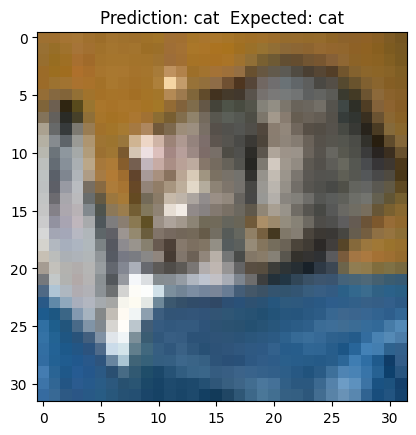

1/1 [==============================] - 0s 21ms/step


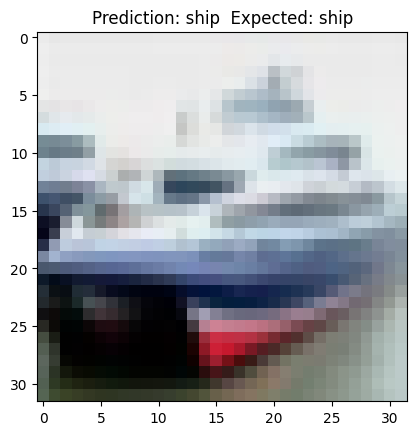

1/1 [==============================] - 0s 24ms/step


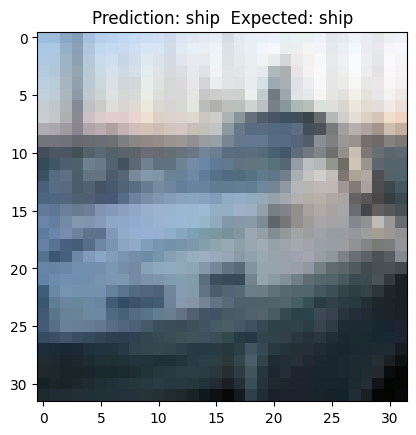

1/1 [==============================] - 0s 22ms/step


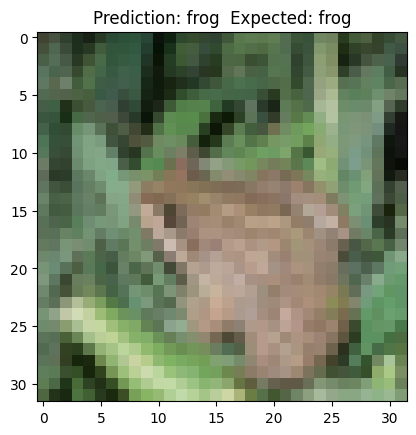

In [14]:
for x in range(5):
  test_image = X_test[x,:]
  predicted_cat = model.predict(np.array([test_image])).argmax()
  label = y_test[x].argmax()

  if predicted_cat == label:
    plt.title('Prediction: %s  Expected: %s' % (class_names[predicted_cat], class_names[label]))
    plt.imshow(test_image)
    plt.show()

Now let's compare some of the model's incorrect predictions against their true labels:

1/1 [==============================] - 0s 20ms/step


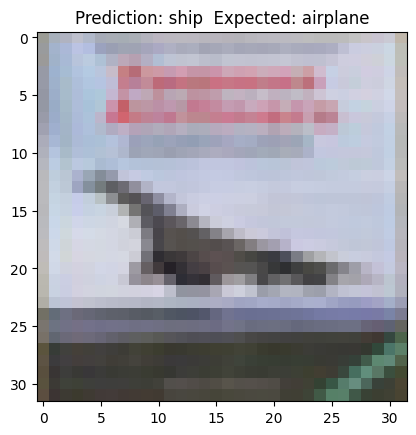

1/1 [==============================] - 0s 21ms/step


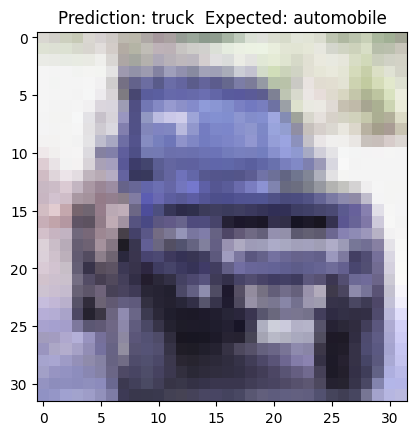

1/1 [==============================] - 0s 23ms/step


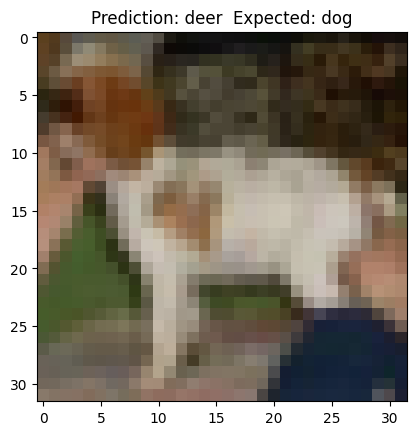

1/1 [==============================] - 0s 22ms/step


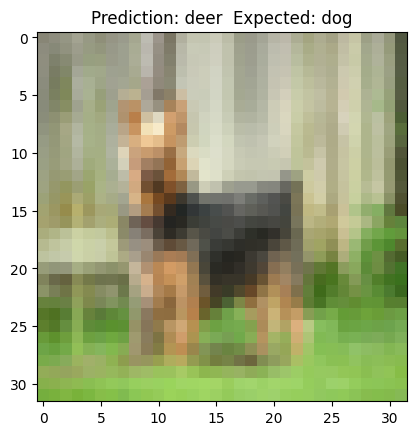

1/1 [==============================] - 0s 28ms/step


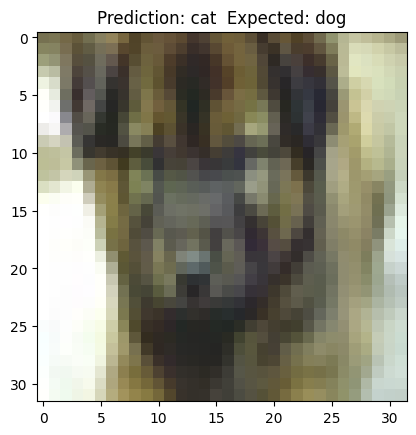

1/1 [==============================] - 0s 26ms/step


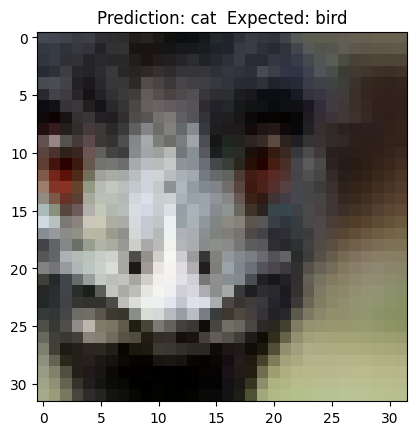

1/1 [==============================] - 0s 29ms/step


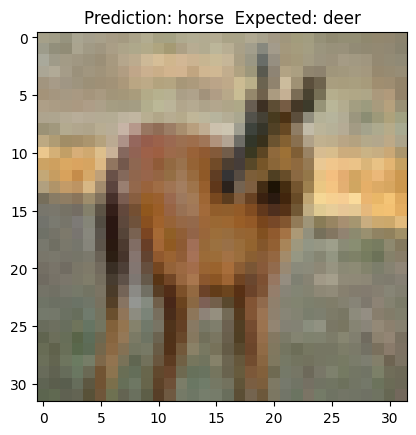

1/1 [==============================] - 0s 28ms/step


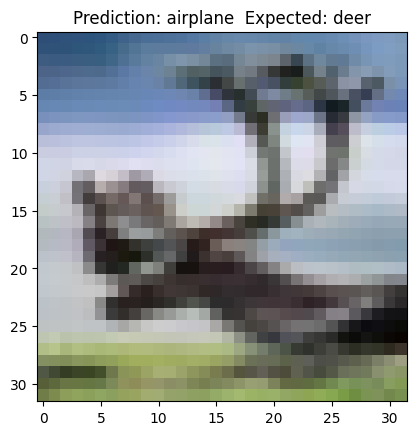

1/1 [==============================] - 0s 31ms/step


In [16]:
for x in range(50):
  test_image = X_test[x,:]
  predicted_cat = model.predict(np.array([test_image])).argmax()
  label = y_test[x].argmax()

  if predicted_cat != label:
    plt.title('Prediction: %s  Expected: %s' % (class_names[predicted_cat], class_names[label]))
    plt.imshow(test_image)
    plt.show()

## Conclusion

In summary, the model achieved a test accuracy of 0.76 and a test loss of 0.69 which is a great result considering we only used 25 epochs to shorten the training time. Also, when observing the incorrect predictions against their true labels we could see that some of these examples would even be a challenge for humans to discern.